In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import os, glob
import matplotlib.pyplot as plt

## UMAP

https://www.kaggle.com/code/bextuychiev/beautiful-umap-tutorial-on-100-dimensional-data/notebook

In [2]:
df_join_RF=pd.read_csv("data/data_resume/imputed_SDG_RF.csv",index_col=[0])
df_join_RF

,1.2.1_SI_POV_NAHC,1.3.1_SI_COV_PENSN,1.4.1_SP_ACS_BSRVH2O,1.4.1_SP_ACS_BSRVSAN,1.a.2_SD_XPD_ESED,10.4.1_SL_EMP_GTOTL,10.5.1_FI_FSI_FSLS,10.5.1_FI_FSI_FSKNL,10.5.1_FI_FSI_FSANL,10.5.1_FI_FSI_FSERA,...,9.2.1_NV_IND_MANF,9.2.1_NV_IND_MANFPC,9.2.2_SL_TLF_MANF,9.3.2_FC_ACC_SSID,9.a.1_DC_TOF_INFRAL,9.b.1_NV_IND_TECH,9.c.1_IT_MOB_2GNTWK,9.c.1_IT_MOB_3GNTWK,9.c.1_IT_MOB_4GNTWK,Human Development Index
Afghanistan,54.5000,10.70,73.43,47.58,15.66,44.5700,90.6900,3.4800,8.8900,0.7800,...,11.32,68.8,7.7,2.3800,469.75,9.5100,90.00,55.00,7.00,0.478
Albania,14.4000,77.00,90.92,97.63,8.44,53.1400,19.9300,15.0100,11.0800,1.2000,...,6.31,286.7,10.1,20.8900,363.75,4.4700,99.86,99.20,85.50,0.796
Algeria,5.3700,63.60,92.56,86.49,11.43,46.3400,47.4500,39.3500,12.7000,2.4200,...,4.54,190.4,10.7,33.7067,6.11,2.6900,98.04,97.45,52.84,0.745
Angola,37.8700,14.50,51.51,45.81,8.68,47.3100,27.8200,25.7600,23.2400,4.2800,...,8.31,283.9,2.4,2.4500,23.31,3.3700,90.00,85.00,8.00,0.586
Antigua and Barbuda,19.7998,83.67,96.74,87.50,6.93,50.4911,62.8300,26.5100,6.3500,1.3500,...,2.41,409.8,4.6,50.0000,4.61,17.4427,99.00,99.00,99.00,0.788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,14.1000,100.00,97.82,100.00,23.03,41.4400,41.1700,4.2700,1.2800,2.0500,...,19.73,495.9,12.0,20.7000,877.27,23.7404,98.60,75.50,44.00,0.727
Vanuatu,12.7000,8.50,93.08,37.21,12.69,67.4500,94.8000,57.4000,15.0500,0.4800,...,3.15,91.6,1.9,56.7300,39.82,9.5845,98.00,69.00,33.00,0.607
Yemen,36.4700,7.00,65.74,63.25,12.49,42.5500,69.0339,11.9949,10.9193,1.8653,...,11.03,83.1,5.5,3.3800,429.91,2.0600,95.00,95.00,0.00,0.455
Zambia,54.4000,9.30,61.93,27.18,17.05,51.4000,57.0100,4.2900,10.9500,2.9800,...,7.38,99.8,7.4,11.2200,134.33,9.7300,86.90,76.50,43.41,0.565


Analizing HDI..

In [3]:
countries=pd.read_excel("data/data_countries_by_regions.xlsx",sheet_name="data2")
countries.index=countries["name"]

In [4]:
for i in countries["region"].unique():
    print(i,countries[countries["region"]==i]["sub-region"].unique())

Asia ['Southern Asia' 'Western Asia' 'South-eastern Asia' 'Eastern Asia'
 'Central Asia']
Europe ['Northern Europe' 'Southern Europe' 'Western Europe' 'Eastern Europe']
Africa ['Northern Africa' 'Sub-Saharan Africa']
Oceania ['Polynesia' 'Australia and New Zealand' 'Melanesia' 'Micronesia']
Americas ['Latin America and the Caribbean' 'Northern America']
nan []


In [5]:
countries_e=countries[["region","sub-region"]]
countries_e=pd.merge(left=df_join_RF, right=countries_e, left_index=True, right_index=True)

In [6]:
countries_e["region"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [7]:
countries_e[countries_e["region"]=="Americas"]["Human Development Index"].mean()

0.7475862068965519

In [8]:
leni,regi,mean,std,mini,maxi=[],[],[],[],[],[]
for i in countries_e["region"].unique():
    mean.append(countries_e[countries_e["region"]==i]["Human Development Index"].mean())
    std.append(countries_e[countries_e["region"]==i]["Human Development Index"].std())
    mini.append(countries_e[countries_e["region"]==i]["Human Development Index"].min())
    maxi.append(countries_e[countries_e["region"]==i]["Human Development Index"].max())
    regi.append(i)
    leni.append(len(countries_e[countries_e["region"]==i]))
resume_regi=pd.DataFrame()
resume_regi["Region"],resume_regi["Mean"],resume_regi["Std"],resume_regi["Mini"],resume_regi["Maxi"],resume_regi["Quan"]=regi,mean,std,mini,maxi,leni

In [9]:
leni2,regi2,mean2,std2,mini2,maxi2=[],[],[],[],[],[]
for i in countries_e["sub-region"].unique():
    mean2.append(countries_e[countries_e["sub-region"]==i]["Human Development Index"].mean())
    std2.append(countries_e[countries_e["sub-region"]==i]["Human Development Index"].std())
    mini2.append(countries_e[countries_e["sub-region"]==i]["Human Development Index"].min())
    maxi2.append(countries_e[countries_e["sub-region"]==i]["Human Development Index"].max())
    regi2.append(i)
    leni2.append(len(countries_e[countries_e["sub-region"]==i]))
resume_regi2=pd.DataFrame()
resume_regi2["Region"],resume_regi2["Mean"],resume_regi2["Std"],resume_regi2["Mini"],resume_regi2["Maxi"],resume_regi2["Quan"]=regi2,mean2,std2,mini2,maxi2,leni2

In [10]:
resume_regi=resume_regi.sort_values(by="Mean")
resume_regi2=resume_regi2.sort_values(by="Mean")

/usr/lib/python3/dist-packages/numpy/core/_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


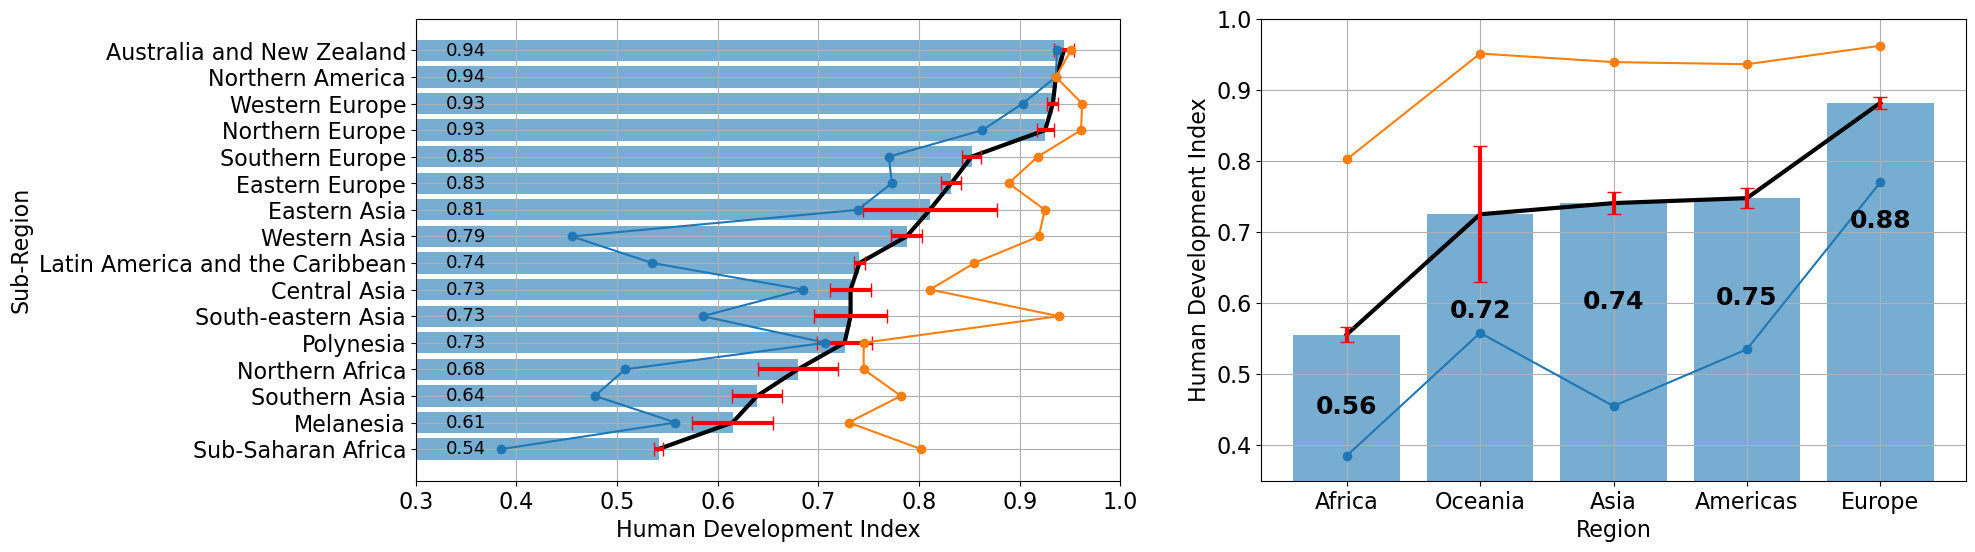

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(122)
plt.errorbar(resume_regi["Region"],resume_regi["Mean"],yerr=resume_regi["Std"]/resume_regi["Quan"]*5,lw=3,capsize=5,barsabove=True,ecolor="r",color="k")
plt.bar(resume_regi["Region"],resume_regi["Mean"],alpha=0.6)
for i in range(len(resume_regi["Region"])):
    plt.text(resume_regi["Region"][i],resume_regi["Mean"][i]*0.8,str(np.round(resume_regi["Mean"][i],2)),ha="center",fontsize=18,fontweight="bold")
plt.plot(resume_regi["Region"],resume_regi["Mini"],marker="o")
plt.plot(resume_regi["Region"],resume_regi["Maxi"],marker="o")
plt.grid()
plt.ylim(0.35,1.)
plt.xlabel("Region",fontsize=16)
plt.ylabel("Human Development Index",fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.subplot(121)
plt.errorbar(resume_regi2["Mean"],resume_regi2["Region"],xerr=resume_regi2["Std"]/resume_regi2["Quan"]*2,lw=3,capsize=5,barsabove=True,ecolor="r",color="k")
plt.barh(resume_regi2["Region"],resume_regi2["Mean"],alpha=0.6)
for i in range(len(resume_regi2["Region"])):
    plt.text((np.ones(len(resume_regi2["Mean"]))*0.35)[i],resume_regi2["Region"][i],str(np.round(resume_regi2["Mean"][i],2)),ha="center",va="center",fontsize=13)
plt.plot(resume_regi2["Mini"],resume_regi2["Region"],marker="o")
plt.plot(resume_regi2["Maxi"],resume_regi2["Region"],marker="o")
plt.xlim(0.3,1.)
plt.ylabel("Sub-Region",fontsize=16)
plt.xlabel("Human Development Index",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.savefig("regions_subregions_HDI2021.png",dpi=400,bbox_inches='tight')
plt.show()

Making dimentional reduction....

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
RS=2#5734785#2
np.random.seed(seed=RS)
# Sample the data
X, y = df_join_RF.drop("Human Development Index", axis=1), df_join_RF[["Human Development Index"]].values.flatten()

# Preprocess
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

In [13]:
%%time
from umap import UMAP
#import umap  # pip install umap-learn
N=5
manifold = UMAP(n_components=N,random_state=RS).fit(X, y)
X_reduced = manifold.transform(X)

/usr/local/lib/python3.11/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

CPU times: user 7.12 s, sys: 87.9 ms, total: 7.21 s
Wall time: 6.93 s


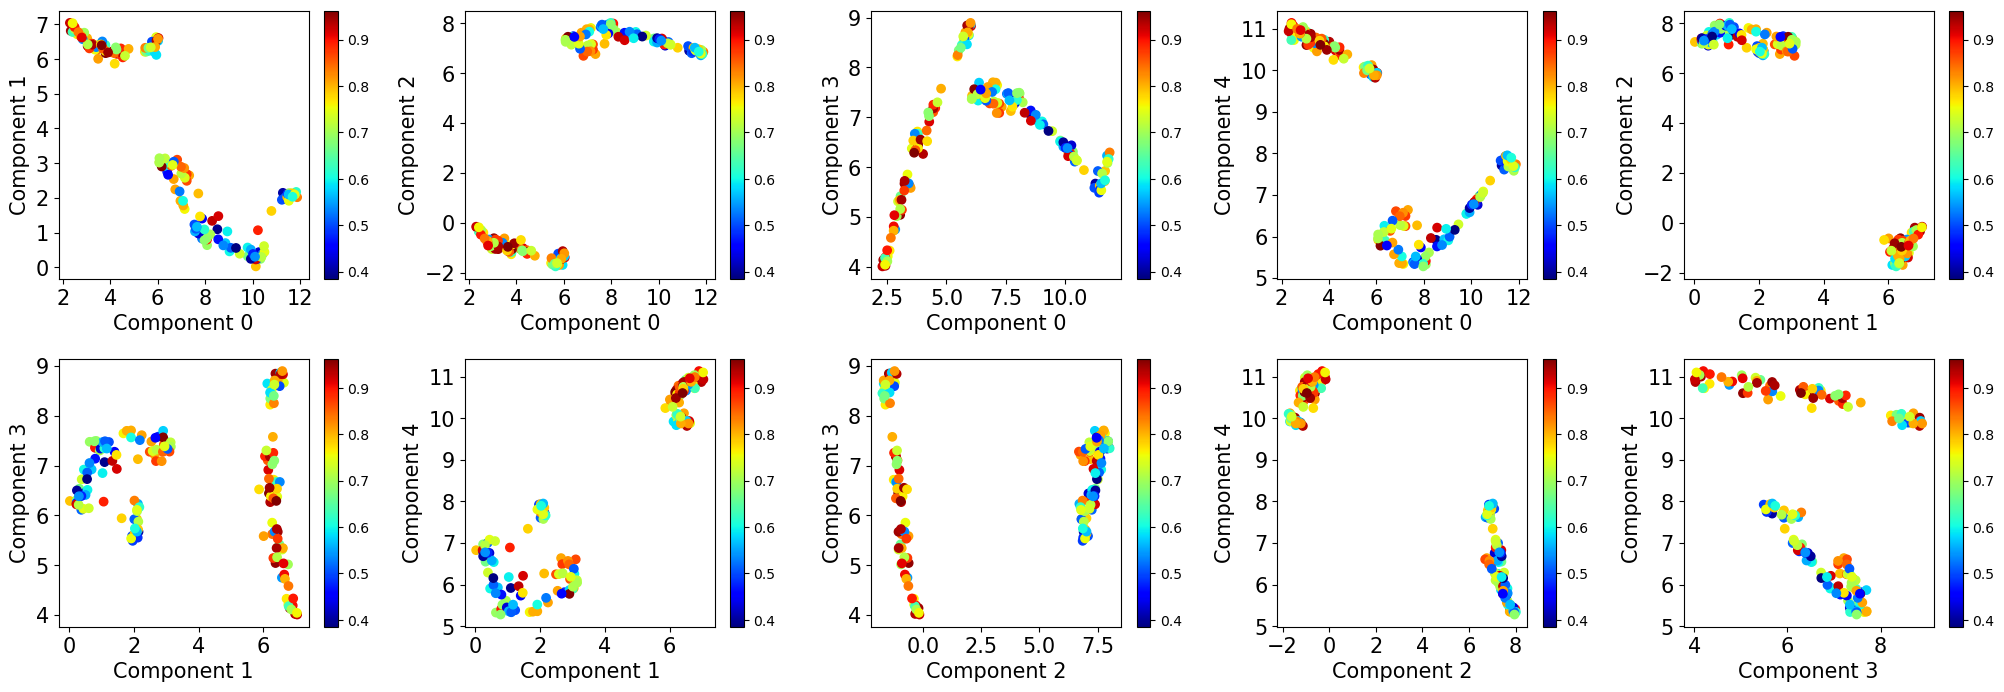

In [14]:
plt.figure(figsize=(25,8))
k,i,j=0,0,0
while(i<5):
    j=0
    while(j<5):
        while(j>i):
            k+=1
            plt.subplot(2,5,k)
            plt.scatter(X_reduced[:, i], X_reduced[:, j], c=y, cmap="jet")
            plt.xlabel("Component {}".format(i),fontsize=15); plt.ylabel("Component {}".format(j),fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15)
            plt.colorbar()
            break
        j+=1
    i+=1
    plt.subplots_adjust(hspace=0.3,wspace=0.3)



Even though it is fun to look at, the plot does not show any clear patterns. It is because we didn't scale the features before fitting UMAP. The algorithm uses distance metrics to group similar data points, and features with higher scales bias such calculations.

So, we will choose Quantile Transformer to scale the features based on their quantiles and median. This scaling method suits the dataset better since it contains many skewed and bimodal features:


In [15]:
%%time
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, FunctionTransformer, SplineTransformer

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="mean"), SplineTransformer())
X = pipe.fit_transform(X.copy())

# Fit UMAP to processed data
manifold = UMAP(n_components=N,random_state=RS).fit(X, y)
X_reduced_2 = manifold.transform(X)

CPU times: user 876 ms, sys: 0 ns, total: 876 ms
Wall time: 663 ms


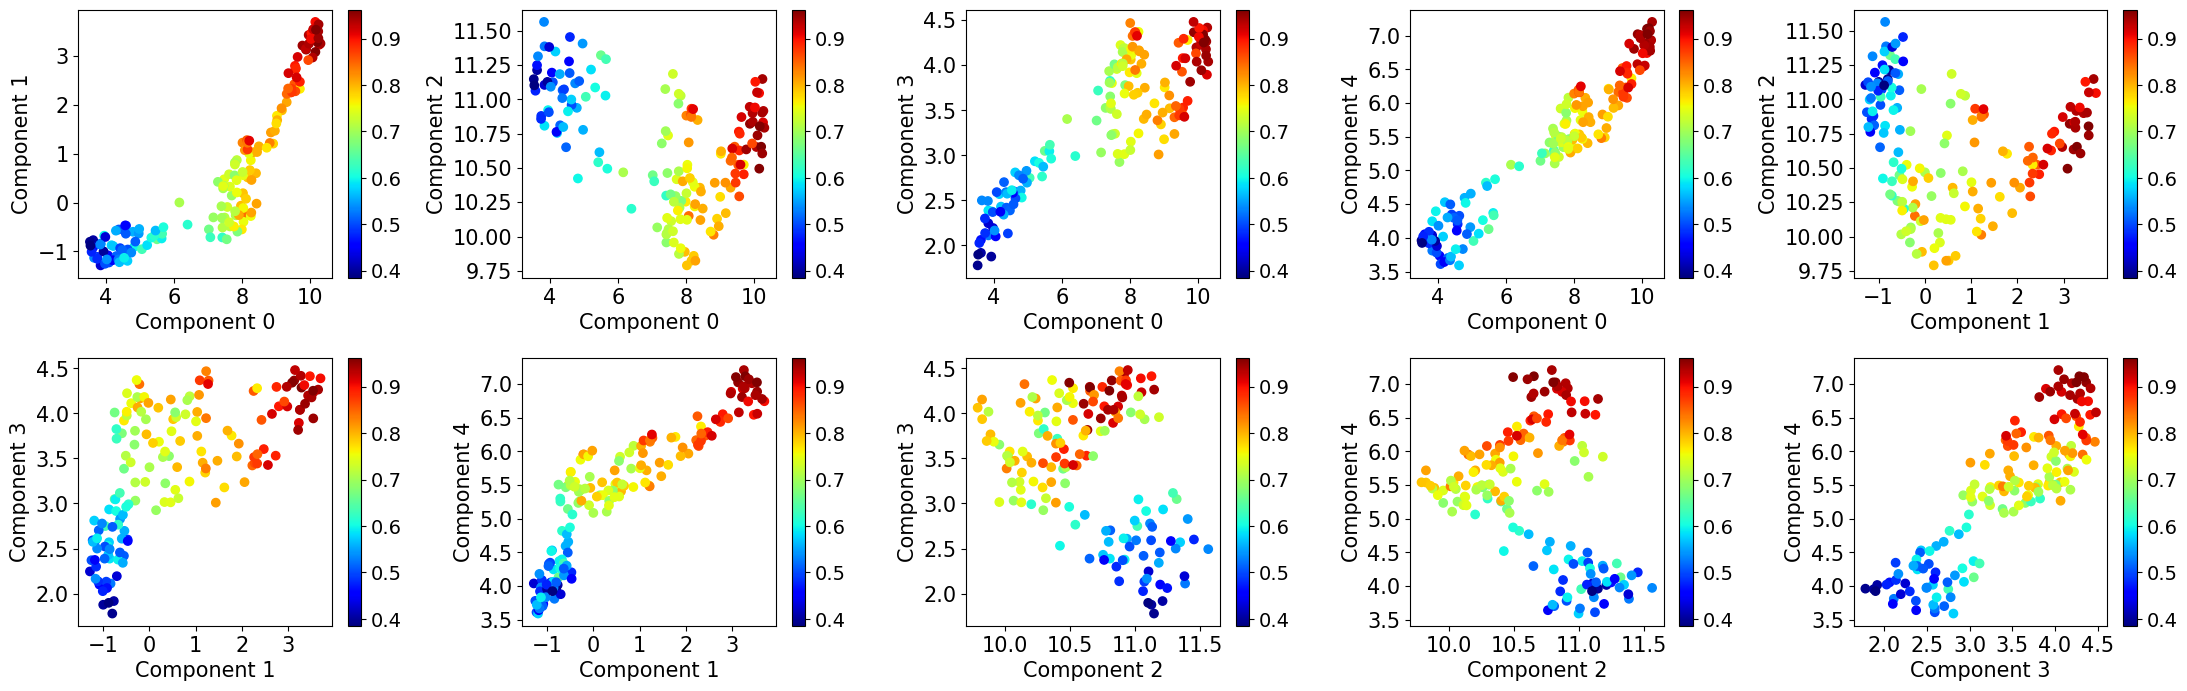

In [16]:
plt.figure(figsize=(27,8))
k,i,j=0,0,0
while(i<5):
    j=0
    while(j<5):
        while(j>i):
            k+=1
            plt.subplot(2,5,k)
            plt.scatter(X_reduced_2[:, i], X_reduced_2[:, j], c=y, cmap="jet")
            plt.xlabel("Component {}".format(i),fontsize=15); plt.ylabel("Component {}".format(j),fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15)
            cbar = plt.colorbar()
            for t in cbar.ax.get_yticklabels():
                 t.set_fontsize(14)
            break
        j+=1
    i+=1
    plt.subplots_adjust(hspace=0.3,wspace=0.4)
plt.savefig("componentsUMAP.png",dpi=400,bbox_inches='tight')
plt.show()

# Checking the correlation...

In [17]:
comp0,comp1,comp2,comp3,comp4,indx=[],[],[],[],[],[]
for i in df_join_RF.columns:
    indx.append(i)
    comp0.append(np.corrcoef(df_join_RF[i],X_reduced_2[:,0])[0][1])
    comp1.append(np.corrcoef(df_join_RF[i],X_reduced_2[:,1])[0][1])
    comp2.append(np.corrcoef(df_join_RF[i],X_reduced_2[:,2])[0][1])
    comp3.append(np.corrcoef(df_join_RF[i],X_reduced_2[:,3])[0][1])
    comp4.append(np.corrcoef(df_join_RF[i],X_reduced_2[:,4])[0][1])

In [18]:
resume1=pd.DataFrame()
resume1["C0"],resume1["C1"],resume1["C2"],resume1["C3"],resume1["C4"]=comp0,comp1,comp2,comp3,comp4
resume1.index=indx

In [19]:
resume1

,C0,C1,C2,C3,C4
1.2.1_SI_POV_NAHC,-0.717201,-0.637195,0.213197,-0.652276,-0.677064
1.3.1_SI_COV_PENSN,0.757499,0.682872,-0.489819,0.532743,0.714381
1.4.1_SP_ACS_BSRVH2O,0.879213,0.674352,-0.478086,0.846775,0.829058
1.4.1_SP_ACS_BSRVSAN,0.910989,0.733506,-0.479953,0.849406,0.864562
1.a.2_SD_XPD_ESED,-0.159187,-0.239086,0.003892,-0.083919,-0.139317
...,...,...,...,...,...
9.b.1_NV_IND_TECH,0.631991,0.715775,0.051493,0.552839,0.676212
9.c.1_IT_MOB_2GNTWK,0.558641,0.425554,-0.256214,0.529606,0.480155
9.c.1_IT_MOB_3GNTWK,0.704462,0.542852,-0.348999,0.715819,0.635351
9.c.1_IT_MOB_4GNTWK,0.742849,0.634678,-0.269837,0.735214,0.717091


In [20]:
threshold=0.7
for i in ["C0","C1","C2","C3","C4"]:
    print("Component {}".format(i),"Number of variables = {}".format(len(resume1[abs(resume1[i])>=threshold][i].index)),
          "Variables=",resume1[abs(resume1[i])>=threshold][i].index)
C0_var1=resume1[abs(resume1["C0"])>=threshold]["C0"].index[:-1]
C1_var1=resume1[abs(resume1["C1"])>=threshold]["C1"].index[:-1]
C2_var1=resume1[abs(resume1["C2"])>=threshold]["C2"].index[:-1]
C3_var1=resume1[abs(resume1["C3"])>=threshold]["C3"].index[:-1]
C4_var1=resume1[abs(resume1["C4"])>=threshold]["C4"].index[:-1]

Component C0 Number of variables = 30 Variables= Index(['1.2.1_SI_POV_NAHC', '1.3.1_SI_COV_PENSN', '1.4.1_SP_ACS_BSRVH2O',
       '1.4.1_SP_ACS_BSRVSAN', '12.4.2_EN_EWT_GENPCAP', '16.9.1_SG_REG_BRTH',
       '2.1.1_SN_ITK_DEFC', '2.2.1_SH_STA_STUNT', '2.a.1_AG_PRD_AGVAS',
       '3.1.1_SH_STA_MMR', '3.2.1_SH_DYN_IMRT', '3.2.1_SH_DYN_MORT',
       '3.2.2_SH_DYN_NMRT', '3.6.1_SH_STA_TRAF', '3.7.2_SP_DYN_ADKL',
       '3.9.1_SH_AAP_ASMORT', '3.9.1_SH_HAP_ASMORT', '3.9.2_SH_STA_WASH',
       '3.9.3_SH_STA_POISN', '3.c.1_SH_MED_HEAWOR', '4.1.1_SE_TOT_PRFL',
       '4.1.2_SE_TOT_CPLR', '4.5.1_SE_AWP_CPRA', '7.1.1_EG_ELC_ACCS',
       '7.1.2_EG_EGY_CLEAN', '8.10.1_FB_ATM_TOTL', '8.10.2_FB_BNK_ACCSS',
       '9.c.1_IT_MOB_3GNTWK', '9.c.1_IT_MOB_4GNTWK',
       'Human Development Index'],
      dtype='object')
Component C1 Number of variables = 16 Variables= Index(['1.4.1_SP_ACS_BSRVSAN', '12.4.2_EN_EWT_GENPCAP', '2.2.1_SH_STA_STUNT',
       '3.2.1_SH_DYN_IMRT', '3.2.2_SH_DYN_NMRT', '3.6.1_SH_S

# Explained variance...

In [21]:
from sklearn.metrics import explained_variance_score
comp0,comp1,comp2,comp3,comp4,indx=[],[],[],[],[],[]
for i in df_join_RF.columns:
    indx.append(i)
    comp0.append(explained_variance_score(df_join_RF[i],X_reduced_2[:,0]))
    comp1.append(explained_variance_score(df_join_RF[i],X_reduced_2[:,1]))
    comp2.append(explained_variance_score(df_join_RF[i],X_reduced_2[:,2]))
    comp3.append(explained_variance_score(df_join_RF[i],X_reduced_2[:,3]))
    comp4.append(explained_variance_score(df_join_RF[i],X_reduced_2[:,4]))
resume2=pd.DataFrame()
resume2["C0"],resume2["C1"],resume2["C2"],resume2["C3"],resume2["C4"]=comp0,comp1,comp2,comp3,comp4
resume2.index=indx

In [22]:
resume2

,C0,C1,C2,C3,C4
1.2.1_SI_POV_NAHC,-0.204269,-0.126347,0.010168,-0.060236,-0.085832
1.3.1_SI_COV_PENSN,0.084809,0.054607,-0.011206,0.020820,0.037927
1.4.1_SP_ACS_BSRVH2O,0.230445,0.126018,-0.027257,0.080234,0.105517
1.4.1_SP_ACS_BSRVSAN,0.129740,0.074358,-0.014050,0.042489,0.058468
1.a.2_SD_XPD_ESED,-0.347408,-0.255004,-0.007004,-0.049742,-0.102457
...,...,...,...,...,...
9.b.1_NV_IND_TECH,0.149852,0.125462,0.001988,0.048031,0.079455
9.c.1_IT_MOB_2GNTWK,0.200244,0.109933,-0.024216,0.075352,0.089217
9.c.1_IT_MOB_3GNTWK,0.134864,0.074069,-0.014408,0.049332,0.058701
9.c.1_IT_MOB_4GNTWK,0.087147,0.053116,-0.006554,0.030330,0.039970


In [23]:
threshold=0.4
for i in ["C0","C1","C2","C3","C4"]:
    print("Component {}".format(i),"Number of variables = {}".format(len(resume2[abs(resume2[i])>=threshold][i].index)),
          "Variables=",resume2[abs(resume2[i])>=threshold][i].index)
C0_var2=resume2[abs(resume2["C0"])>=threshold]["C0"].index[:-1]
C1_var2=resume2[abs(resume2["C1"])>=threshold]["C1"].index[:-1]
C2_var2=resume2[abs(resume2["C2"])>=threshold]["C2"].index[:-1]
C3_var2=resume2[abs(resume2["C3"])>=threshold]["C3"].index[:-1]
C4_var2=resume2[abs(resume2["C4"])>=threshold]["C4"].index[:-1]

Component C0 Number of variables = 21 Variables= Index(['10.5.1_FI_FSI_FSERA', '12.2.2_EN_MAT_DOMCMPG', '12.4.2_EN_EWT_GENPCAP',
       '2.1.1_SN_ITK_DEFC', '2.a.1_AG_PRD_ORTIND', '2.a.1_AG_XPD_AGSGB',
       '2.c.1_AG_FPA_CFPI', '3.2.2_SH_DYN_NMRT', '3.3.1_SH_HIV_INCD',
       '3.3.4_SH_HAP_HBSAG', '3.4.1_SH_DTH_NCOM', '3.6.1_SH_STA_TRAF',
       '3.8.2_SH_XPD_EARN25', '3.9.3_SH_STA_POISN', '4.5.1_SE_AGP_CPRA',
       '4.5.1_SE_ALP_CPLR', '4.5.1_SE_AWP_CPRA', '6.b.1_ER_H2O_RURP',
       '7.3.1_EG_EGY_PRIM', '8.2.1_SL_EMP_PCAP', 'Human Development Index'],
      dtype='object')
Component C1 Number of variables = 15 Variables= Index(['10.5.1_FI_FSI_FSERA', '12.2.2_EN_MAT_DOMCMPG', '2.a.1_AG_PRD_ORTIND',
       '2.a.1_AG_XPD_AGSGB', '2.c.1_AG_FPA_CFPI', '3.3.1_SH_HIV_INCD',
       '3.3.4_SH_HAP_HBSAG', '3.8.2_SH_XPD_EARN25', '3.9.3_SH_STA_POISN',
       '4.5.1_SE_AGP_CPRA', '4.5.1_SE_ALP_CPLR', '4.5.1_SE_AWP_CPRA',
       '6.b.1_ER_H2O_RURP', '7.3.1_EG_EGY_PRIM', 'Human Development Index

# Making predictions and regressions with information about correlations....

In [24]:
df_join_RF["C0"],df_join_RF["C1"],df_join_RF["C2"],df_join_RF["C3"],df_join_RF["C4"]=X_reduced_2[:,0],X_reduced_2[:,1],X_reduced_2[:,2],X_reduced_2[:,3],X_reduced_2[:,4]

In [25]:
import statsmodels.api as sm

def make_regresssion1(var,comp):
    x = df_join_RF[var]
    y = df_join_RF[comp]

    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    print_model = model.summary()
    print(print_model)
    return

def make_regresssion2():
    y = df_join_RF["Human Development Index"]
    x = df_join_RF[["C0","C1","C2","C3","C4"]]

    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    print_model = model.summary(slim=False)
    print(print_model)
    return

Most important regressions from components and HDI...

In [26]:
for i in ["C0","C1","C2","C3","C4"]:
    print("Correlation coeficient between HDI and {} is".format(i),np.corrcoef(df_join_RF["Human Development Index"],df_join_RF[i])[0][1])
for i in ["C0","C1","C2","C3","C4"]:
    print("Explained variance score between HDI and {} is".format(i),explained_variance_score(df_join_RF["Human Development Index"],df_join_RF[i]))

Correlation coeficient between HDI and C0 is 0.9597633303598999
Correlation coeficient between HDI and C1 is 0.8758881483794088
Correlation coeficient between HDI and C2 is -0.39224254996237856
Correlation coeficient between HDI and C3 is 0.8684813669339814
Correlation coeficient between HDI and C4 is 0.9465048277973566
Explained variance score between HDI and C0 is -166.31294672543817
Explained variance score between HDI and C1 is -79.54847736560484
Explained variance score between HDI and C2 is -9.398626004283848
Explained variance score between HDI and C3 is -14.323353356285676
Explained variance score between HDI and C4 is -29.464976470812463


In [27]:
regr1=make_regresssion2()

                               OLS Regression Results                              
Dep. Variable:     Human Development Index   R-squared:                       0.937
Model:                                 OLS   Adj. R-squared:                  0.935
Method:                      Least Squares   F-statistic:                     458.0
Date:                     Thu, 22 Jun 2023   Prob (F-statistic):           4.20e-90
Time:                             16:57:36   Log-Likelihood:                 291.80
No. Observations:                      159   AIC:                            -571.6
Df Residuals:                          153   BIC:                            -553.2
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [28]:
# Making predictions and regressions with information about correlation coeficients....

In [29]:
make_regresssion1(C0_var1,"C0")

                            OLS Regression Results                            
Dep. Variable:                     C0   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     169.3
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           7.46e-89
Time:                        16:57:36   Log-Likelihood:                -55.480
No. Observations:                 159   AIC:                             171.0
Df Residuals:                     129   BIC:                             263.0
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.28

In [30]:
make_regresssion1(C1_var1,"C1")

                            OLS Regression Results                            
Dep. Variable:                     C1   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     97.63
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.42e-67
Time:                        16:57:36   Log-Likelihood:                -99.617
No. Observations:                 159   AIC:                             231.2
Df Residuals:                     143   BIC:                             280.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.04

In [31]:
make_regresssion1(C2_var1,"C2")

                            OLS Regression Results                            
Dep. Variable:                     C2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                nan
Time:                        16:57:36   Log-Likelihood:                -86.294
No. Observations:                 159   AIC:                             174.6
Df Residuals:                     158   BIC:                             177.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6529      0.033    321.609      0.0

In [32]:
make_regresssion1(C3_var1,"C3")

                            OLS Regression Results                            
Dep. Variable:                     C3   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     53.61
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           5.34e-55
Time:                        16:57:36   Log-Likelihood:                -3.6303
No. Observations:                 159   AIC:                             49.26
Df Residuals:                     138   BIC:                             113.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.35

In [33]:
make_regresssion1(C4_var1,"C4")

                            OLS Regression Results                            
Dep. Variable:                     C4   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     89.58
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           3.16e-71
Time:                        16:57:36   Log-Likelihood:                 7.5700
No. Observations:                 159   AIC:                             38.86
Df Residuals:                     132   BIC:                             121.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.94

In [34]:
# Making predictions and regressions with information about explained variances....

In [35]:
make_regresssion1(C0_var2,"C0")

                            OLS Regression Results                            
Dep. Variable:                     C0   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     139.9
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           2.88e-81
Time:                        16:57:36   Log-Likelihood:                -103.78
No. Observations:                 159   AIC:                             249.6
Df Residuals:                     138   BIC:                             314.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.44

In [36]:
make_regresssion1(C1_var2,"C1")

                            OLS Regression Results                            
Dep. Variable:                     C1   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     22.86
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           7.30e-30
Time:                        16:57:36   Log-Likelihood:                -198.93
No. Observations:                 159   AIC:                             427.9
Df Residuals:                     144   BIC:                             473.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.74

In [37]:
make_regresssion1(C2_var2,"C2")

                            OLS Regression Results                            
Dep. Variable:                     C2   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     15.38
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           8.24e-09
Time:                        16:57:36   Log-Likelihood:                -65.573
No. Observations:                 159   AIC:                             139.1
Df Residuals:                     155   BIC:                             151.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9723      0.14

In [38]:
make_regresssion1(C3_var2,"C3")

                            OLS Regression Results                            
Dep. Variable:                     C3   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     60.23
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           4.08e-47
Time:                        16:57:36   Log-Likelihood:                -47.203
No. Observations:                 159   AIC:                             116.4
Df Residuals:                     148   BIC:                             150.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.64

In [39]:
make_regresssion1(C4_var2,"C4")

                            OLS Regression Results                            
Dep. Variable:                     C4   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     53.19
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.18e-45
Time:                        16:57:36   Log-Likelihood:                -97.375
No. Observations:                 159   AIC:                             218.7
Df Residuals:                     147   BIC:                             255.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.87

After regressions....